In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter



from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support,
                             plot_confusion_matrix,
                             plot_precision_recall_curve)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [24]:
#Loading the data
flame = pd.read_csv('../data/flame.txt',delimiter='\t')
flame

,1.85,27.8,1
0,1.35,26.65,1
1,1.40,23.25,2
2,0.85,23.05,2
3,0.50,22.35,2
4,0.65,21.35,2
...,...,...,...
234,7.50,26.20,1
235,7.50,25.65,1
236,7.05,25.85,1
237,6.90,27.15,1


In [25]:
x = flame.values[:,:-1] #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
flame = pd.concat([pd.DataFrame(x_scaled),flame.iloc[:,-1]],axis=1)
flame

,0,1,1
0,0.062044,0.927757,1
1,0.065693,0.669202,2
2,0.025547,0.653992,2
3,0.000000,0.600760,2
4,0.010949,0.524715,2
...,...,...,...
234,0.510949,0.893536,1
235,0.510949,0.851711,1
236,0.478102,0.866920,1
237,0.467153,0.965779,1


In [57]:
def results_report(model,y_true):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_true).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics
    
def plot_curves(model,y_true,x_te):
    y_pred = model.predict(x_te)
    skplt.metrics.plot_confusion_matrix(y_true,y_pred)
    predict_proba = getattr(model, "predict_proba", None)
    if callable(predict_proba):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall_curve(y_true,y_probas,us)

Resampled dataset shape Counter({1.0: 153, 0.0: 86})


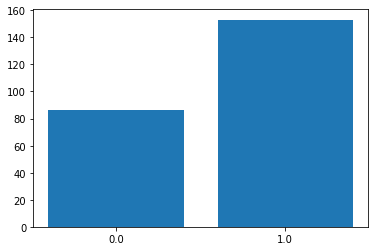

In [6]:
bl = Counter(flame.values[:,-1])
print('Resampled dataset shape %s' % bl)
plt.bar([str(k) for k in bl.keys()],bl.values(),align='center')
plt.show()

Resampled dataset shape Counter({0.0: 153, 1.0: 153})


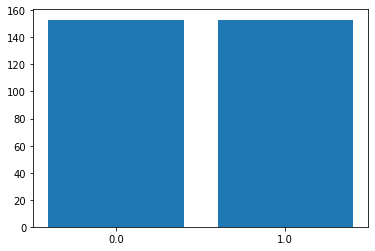

In [7]:
# ooversampling data
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(flame.values[:,:-1],flame.values[:,-1])
bl_os=Counter(Y)
print('Resampled dataset shape %s' % bl_os)
plt.bar([str(k) for k in bl_os.keys()],bl_os.values(),align='center')
plt.show()

In [55]:
# splittign the dataset
x_t,x_te,y_t,y_te = train_test_split(X,
                                     Y,
                                     test_size=0.33, 
                                     random_state=42)


# Naive Bayes classifier

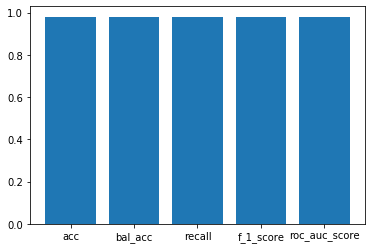

{'acc': 0.9801980198019802, 'bal_acc': 0.9801980198019802, 'recall': 0.9782608695652174, 'f_1_score': 0.9799603174603175, 'roc_auc_score': 0.9782608695652174}
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        55
         2.0       0.00      0.00      0.00         0

   micro avg       0.96      1.00      0.98        55
   macro avg       0.48      0.50      0.49        55
weighted avg       0.96      1.00      0.98        55



/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


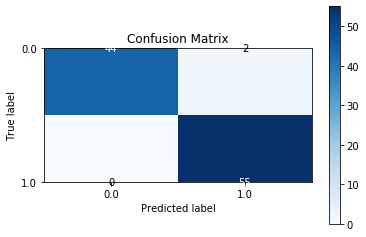

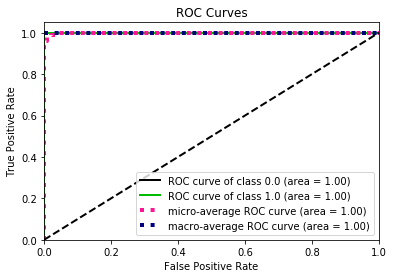

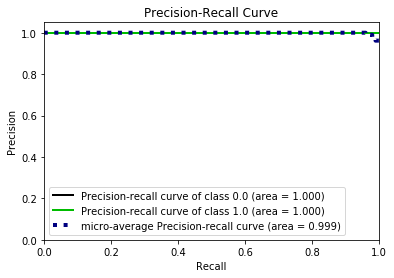

In [58]:
NB_model = GaussianNB()
# fitting the model
NB_model.fit(x_t,y_t)
#evaluating the model
r = results_report(NB_model,y_te)
print(r)
models['Naive Bayes']=r
y_pred = NB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(NB_model,y_te,x_te)

# KNN Classifier

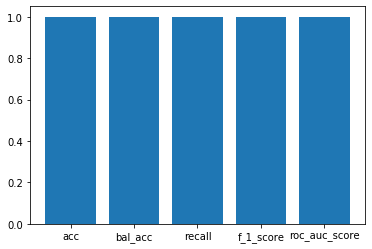

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        55
         2.0       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        55
   macro avg       0.50      0.50      0.50        55
weighted avg       1.00      1.00      1.00        55



/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


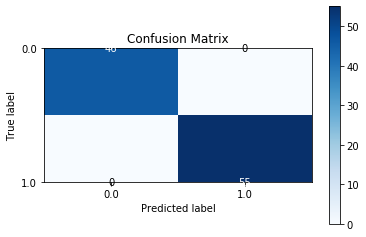

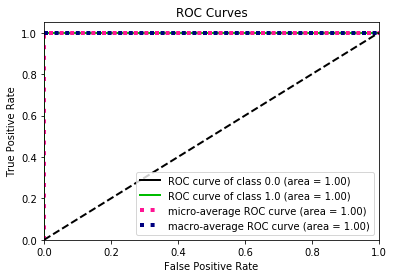

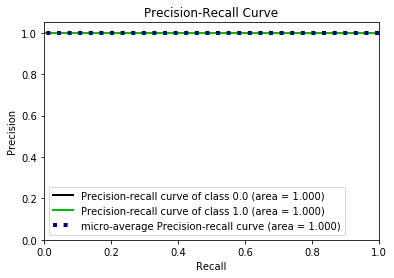

In [59]:
KNN_model = KNeighborsClassifier(n_neighbors)
KNN_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(KNN_model,y_te)
print(r)
models['KNN']=r
y_pred = KNN_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(KNN_model,y_te,x_te)

# Linear Discriminant Analysis

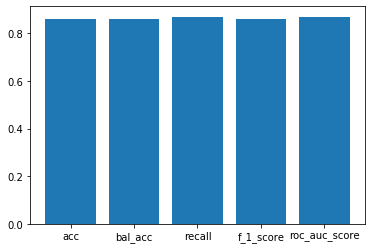

{'acc': 0.8613861386138614, 'bal_acc': 0.8613861386138614, 'recall': 0.8691699604743084, 'f_1_score': 0.8613725490196078, 'roc_auc_score': 0.8691699604743083}
              precision    recall  f1-score   support

         1.0       0.96      0.78      0.86        55
         2.0       0.00      0.00      0.00         0

   micro avg       0.96      0.78      0.86        55
   macro avg       0.48      0.39      0.43        55
weighted avg       0.96      0.78      0.86        55



/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


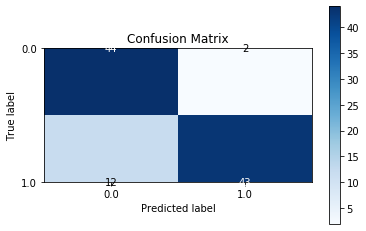

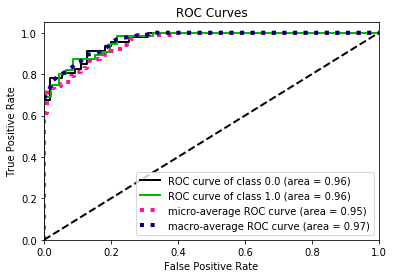

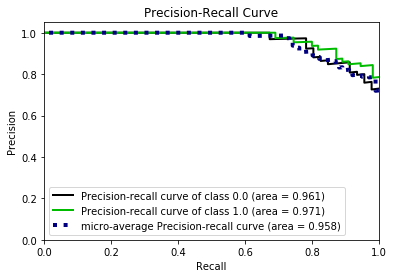

In [60]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LDA_model,y_te)
print(r)
models['LDA']=r
y_pred = LDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(LDA_model,y_te,x_te)

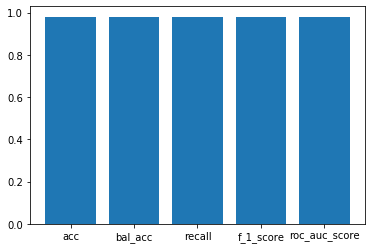

{'acc': 0.9801980198019802, 'bal_acc': 0.9801980198019802, 'recall': 0.9782608695652174, 'f_1_score': 0.9799603174603175, 'roc_auc_score': 0.9782608695652174}
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        55
         2.0       0.00      0.00      0.00         0

   micro avg       0.96      1.00      0.98        55
   macro avg       0.48      0.50      0.49        55
weighted avg       0.96      1.00      0.98        55



/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


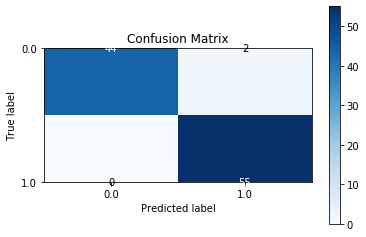

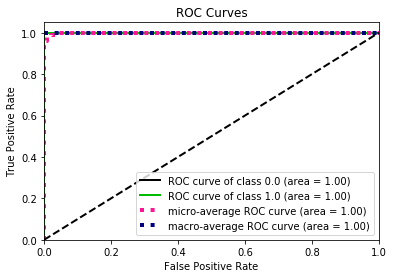

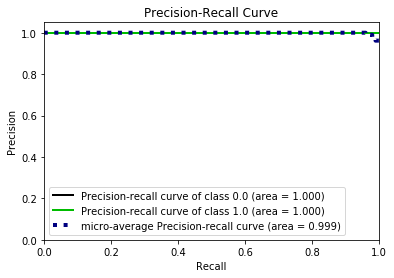

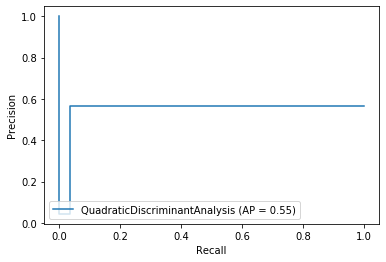

In [52]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(QDA_model,y_te)
print(r)
models['QDA']=r
y_pred = QDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(QDA_model,y_te,x_te)

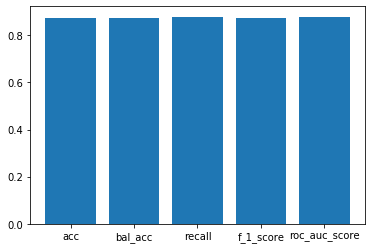

{'acc': 0.8712871287128713, 'bal_acc': 0.8712871287128713, 'recall': 0.8782608695652174, 'f_1_score': 0.8712871287128713, 'roc_auc_score': 0.8782608695652174}
              precision    recall  f1-score   support

         1.0       0.96      0.80      0.87        55
         2.0       0.00      0.00      0.00         0

   micro avg       0.96      0.80      0.87        55
   macro avg       0.48      0.40      0.44        55
weighted avg       0.96      0.80      0.87        55



/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


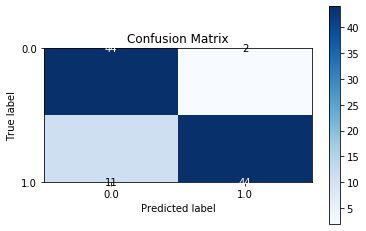

In [53]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LSVM_model,y_te)
print(r)
models['Linear SVM']=r
y_pred = LSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(LSVM_model,y_te,x_te)

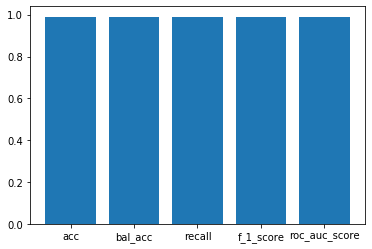

{'acc': 0.9900990099009901, 'bal_acc': 0.9900990099009901, 'recall': 0.9891304347826086, 'f_1_score': 0.99000099000099, 'roc_auc_score': 0.9891304347826088}
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.98      1.00      0.99        55

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



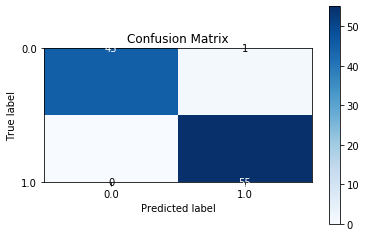

In [14]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(NLSVM_model,y_te)
print(r)
models['Non Linear SVM']=r
y_pred = NLSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(NLSVM_model,y_te,x_te)

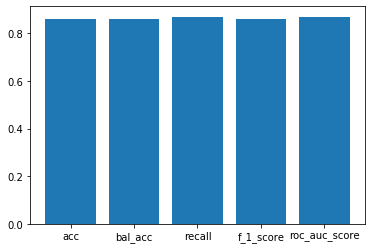

{'acc': 0.8613861386138614, 'bal_acc': 0.8613861386138614, 'recall': 0.8691699604743084, 'f_1_score': 0.8613725490196078, 'roc_auc_score': 0.8691699604743083}
              precision    recall  f1-score   support

         1.0       0.96      0.78      0.86        55
         2.0       0.00      0.00      0.00         0

   micro avg       0.96      0.78      0.86        55
   macro avg       0.48      0.39      0.43        55
weighted avg       0.96      0.78      0.86        55



/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/weiss/p3venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


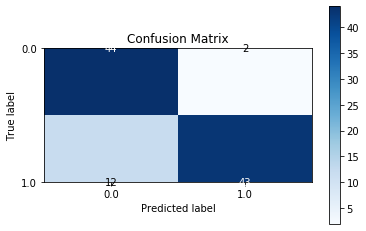

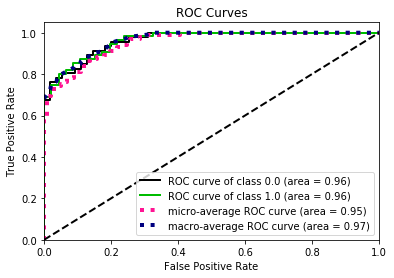

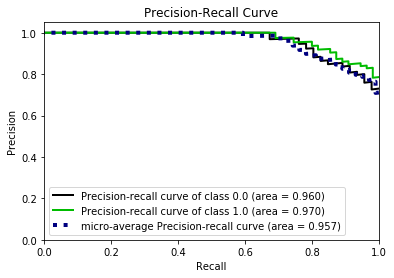

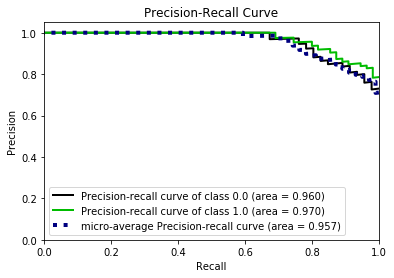

In [28]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LR_model,y_te)
print(r)
models['Logistic Regression']=r
y_pred = LR_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(LR_model,y_te,x_te)  

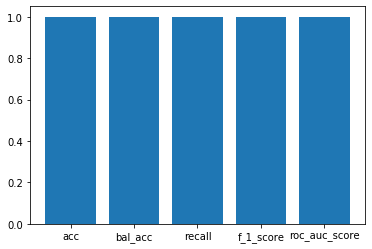

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



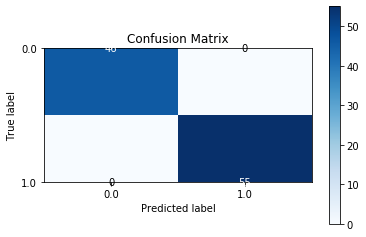

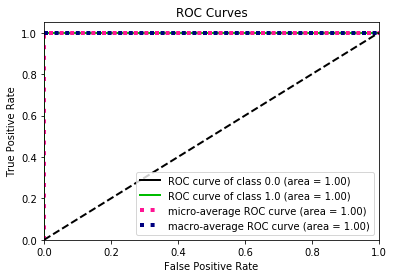

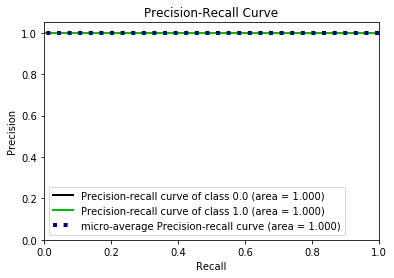

In [17]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(CART_model,y_te)
print(r)
models['CART']=r
y_pred = CART_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(CART_model,y_te,x_te)  

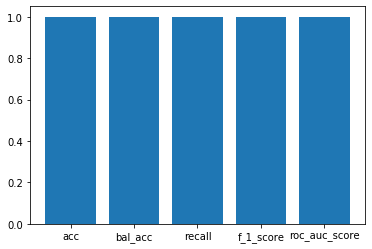

{'acc': 1.0, 'bal_acc': 1.0, 'recall': 1.0, 'f_1_score': 1.0, 'roc_auc_score': 1.0}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



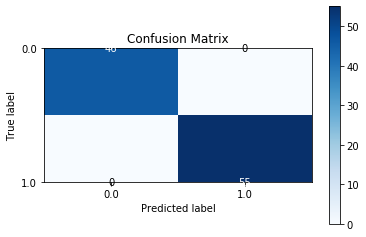

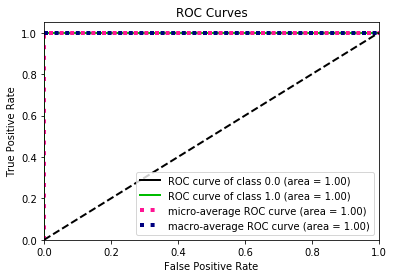

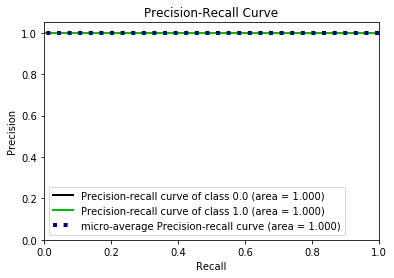

In [18]:
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(RF_model,y_te)
print(r)
models['Random Forest']=r
y_pred = RF_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(RF_model,y_te,x_te)

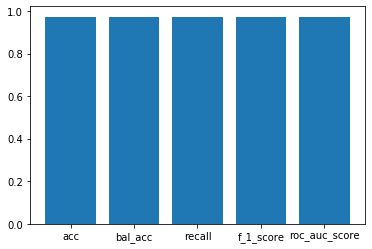

{'acc': 0.9702970297029703, 'bal_acc': 0.9702970297029703, 'recall': 0.9727272727272727, 'f_1_score': 0.9701918347270044, 'roc_auc_score': 0.9727272727272727}
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        46
         1.0       1.00      0.95      0.97        55

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



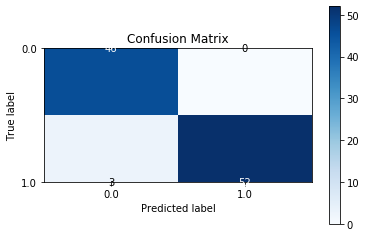

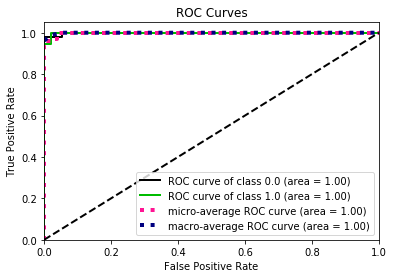

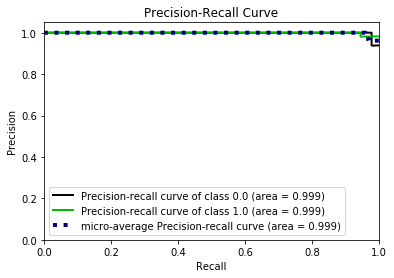

In [19]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(AB_model,y_te)
print(r)
models['AdaBoost']=r
y_pred = AB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

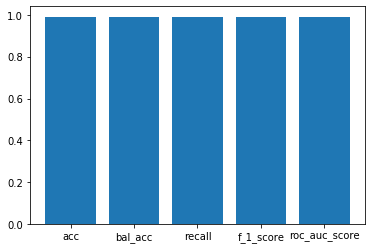

{'acc': 0.9900990099009901, 'bal_acc': 0.9900990099009901, 'recall': 0.990909090909091, 'f_1_score': 0.9900364999506757, 'roc_auc_score': 0.990909090909091}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        46
         1.0       1.00      0.98      0.99        55

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



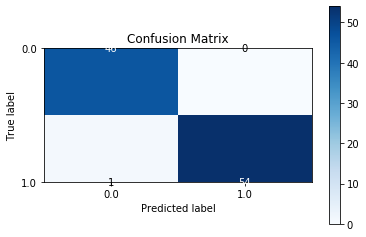

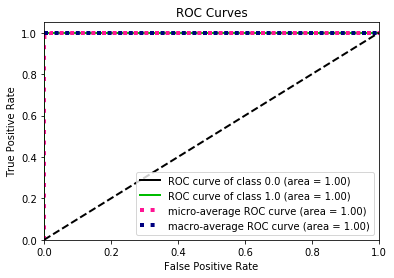

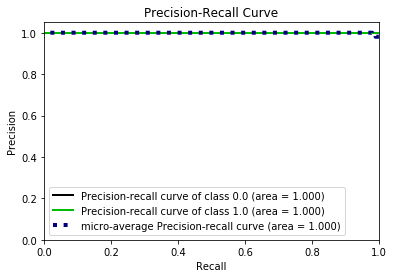

In [20]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(GB_model,y_te)
print(r)
models['GradBoost']=r
y_pred = GB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(flame.values[:,-1]))))
plot_curves(GB_model,y_te,x_te)

In [21]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
KNN,1.000000,1.000000,1.000000,1.000000,1.000000
CART,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
GradBoost,0.990099,0.990099,0.990909,0.990036,0.990909
Non Linear SVM,0.990099,0.990099,0.989130,0.990001,0.989130
Naive Bayes,0.980198,0.980198,0.978261,0.979960,0.978261
QDA,0.980198,0.980198,0.978261,0.979960,0.978261
AdaBoost,0.970297,0.970297,0.972727,0.970192,0.972727
Linear SVM,0.871287,0.871287,0.878261,0.871287,0.878261
LDA,0.861386,0.861386,0.869170,0.861373,0.869170
